# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [99]:
# Checking the number of mice.
unique_mice = combined_data["Mouse ID"].unique()
total_mice = len(unique_mice)
total_mice




249

In [100]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_mice = combined_data.loc[combined_data.duplicated(subset= ['Mouse ID', 'Timepoint']), "Mouse ID"].unique()

# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
# Get the duplicate mice by ID number
duplicate_mice


array(['g989'], dtype=object)

In [101]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id = combined_data.loc[combined_data["Mouse ID"]=="g989"]
duplicate_mice_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data["Mouse ID"] !="g989"]

# Print the clean DataFrame
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [103]:
# Checking the number of mice in the clean DataFrame.

number_mice = clean_df["Mouse ID"].nunique()
number_mice


248

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_Regimen = combined_data.groupby(["Drug Regimen"])
drug_Regimen_mean = drug_Regimen["Tumor Volume (mm3)"].mean()

drug_Regimen_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [105]:

drug_Regimen_median = drug_Regimen["Tumor Volume (mm3)"].median()
drug_Regimen_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [106]:
drug_Regimen_variance = drug_Regimen["Tumor Volume (mm3)"].var()
drug_Regimen_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [107]:
drug_Regimen_standard_deviation = drug_Regimen["Tumor Volume (mm3)"].std()
drug_Regimen_standard_deviation 

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [108]:
drug_Regimen_sem = drug_Regimen["Tumor Volume (mm3)"].sem()
drug_Regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [109]:
#Create a dictionary to hold the above dataset
statistics_summary = {
  'Mean Tumor Volume': drug_Regimen_mean ,
  'Median Tumor Volume': drug_Regimen_median,
  'Tumor Volume Variance' : drug_Regimen_variance,
  'Tumor Volume Std. Dev.': drug_Regimen_standard_deviation,
  'Tumor Volume Std. Err.' : drug_Regimen_sem,
}

statistics_summary_df = pd.DataFrame(statistics_summary)
statistics_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [110]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [111]:
drug_Regimen = combined_data.groupby(["Drug Regimen"])
MOUSEID = drug_Regimen["Mouse ID"].count()
MOUSEID_df = pd.DataFrame(MOUSEID)
MOUSEID_df_sorted= MOUSEID_df.sort_values("Mouse ID", ascending = False)
MOUSEID_df_sorted

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


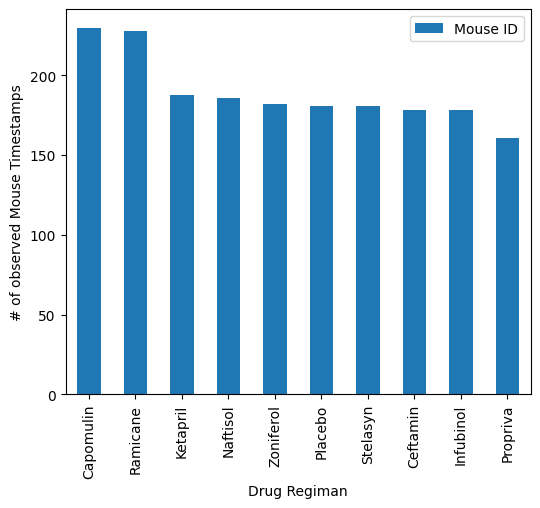

In [112]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
MOUSEID_df_sorted.plot(kind="bar", figsize=(6,5))
plt.xlabel("Drug Regiman")
plt.ylabel("# of observed Mouse Timestamps")
plt.show()


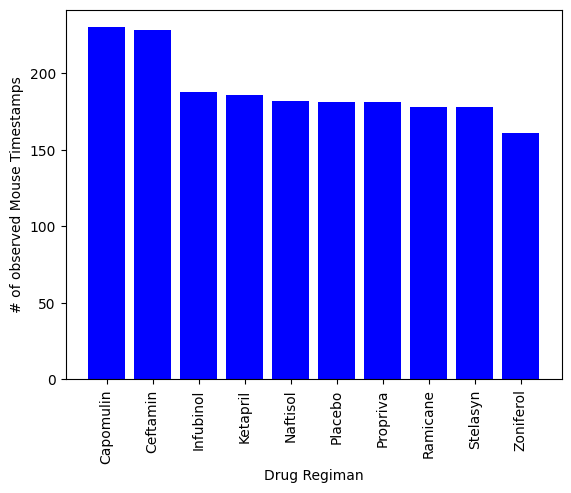

In [113]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_Regimen = ["Capomulin", "Ceftamin","Infubinol" , "Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]
MOUSEID = [230,228, 188, 186, 182, 181 ,181,178,178,161]
x_axis = np.arange(0, len(Drug_Regimen))
tick_location = []
for x in x_axis:
    tick_location.append(x)
plt.bar(x_axis, MOUSEID, color="b", align="center")
plt.xticks(tick_location, Drug_Regimen, rotation="vertical")
plt.xlabel("Drug Regiman")
plt.tight_layout
plt.ylabel("# of observed Mouse Timestamps")
plt.show()

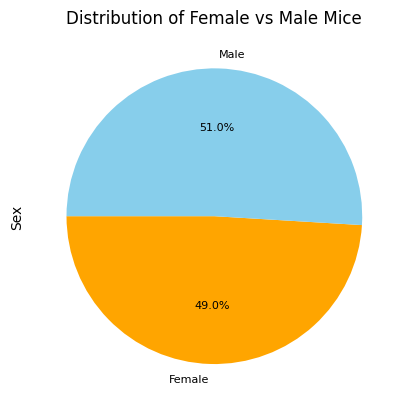

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_df.groupby(["Sex"])["Sex"].count()
# Generate the pie plot
sex_distribution.plot(kind="pie", y= "Sex" , autopct="%1.1f%%", colors= ["orange" , "skyblue"], fontsize= 8, startangle=180)
# Set the title
plt.title('Distribution of Female vs Male Mice')
# Show the plot
plt.show()


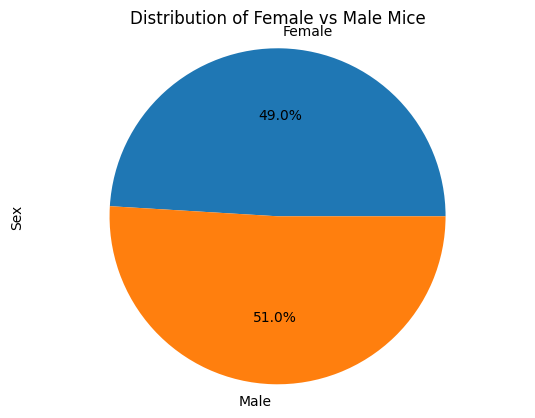

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Data
sex_distribution = clean_df.groupby(["Sex"])["Sex"].count()
labels = sex_distribution .index
colors= ["orange" , "skyblue"]

plt.pie(sex_distribution, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')  
plt.ylabel("Sex")
plt.title('Distribution of Female vs Male Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_timepoints = clean_df.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max()
last_timepoints_df = pd.DataFrame(last_timepoints)
final_tumor_volume = pd.merge(clean_df, last_timepoints_df, on=['Mouse ID'], how="right")
final_tumor_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,b128,Capomulin,Female,9,22,0,45.000000,0,45
1,b128,Capomulin,Female,9,22,5,45.651331,0,45
2,b128,Capomulin,Female,9,22,10,43.270852,0,45
3,b128,Capomulin,Female,9,22,15,43.784893,0,45
4,b128,Capomulin,Female,9,22,20,42.731552,0,45


In [117]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
t_volume = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for value in treatment_regimens :
    volume_df = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"]== value]
    final_volume_df = volume_df.loc[volume_df["Timepoint_x"]== volume_df["Timepoint_y"]]
    final_volume_df

    values = final_volume_df["Tumor Volume (mm3)"]
    t_volume.append(values)
# Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = values.quantile([0.25, 0.5, 0.75])
    iqr= quartiles[0.75]-quartiles[0.25]
    print(f"IQR for {value}: {iqr}")
# add subset 
    lower = quartiles[0.25]- (1.5*iqr)
    upper = quartiles[0.75]- (1.5*iqr)
    print(f"Lower bound for {value}: {lower}")
    print(f"Upper bound for {value}: {upper}")
    # Determine outliers using upper and lower bound
outliers = (values.loc[(final_volume_df["Tumor Volume (mm3)"] >= upper)| (final_volume_df["Tumor Volume (mm3)"] <= lower)]).count()
print(f"Number of {value} outliers: {outliers}")

IQR for Capomulin: 7.781863460000004
Lower bound for Capomulin: 20.70456164999999
Upper bound for Capomulin: 28.486425109999995
IQR for Ramicane: 9.098536719999998
Lower bound for Ramicane: 17.912664470000003
Upper bound for Ramicane: 27.01120119
IQR for Infubinol: 11.477135160000003
Lower bound for Infubinol: 36.83290494999999
Upper bound for Infubinol: 48.310040109999996
IQR for Ceftamin: 15.577752179999997
Lower bound for Ceftamin: 25.355449580000002
Upper bound for Ceftamin: 40.93320176
Number of Ceftamin outliers: 25


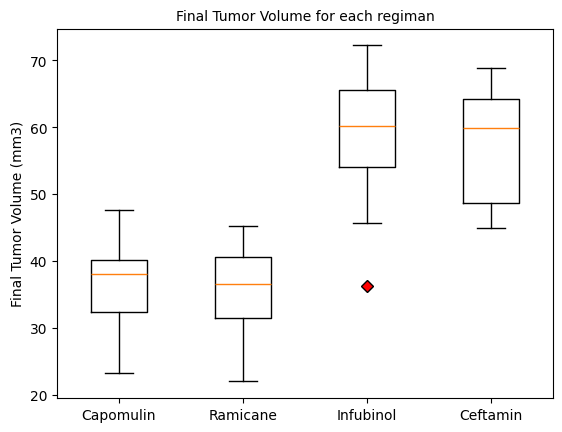

In [118]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_diamond = dict(markerfacecolor = "r" , marker = "D")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(t_volume, flierprops = red_diamond)
ax1.set_title("Final Tumor Volume for each regiman", fontsize=10)
ax1.set_xticklabels(treatment_regimens)
plt.show()

## Line and Scatter Plots

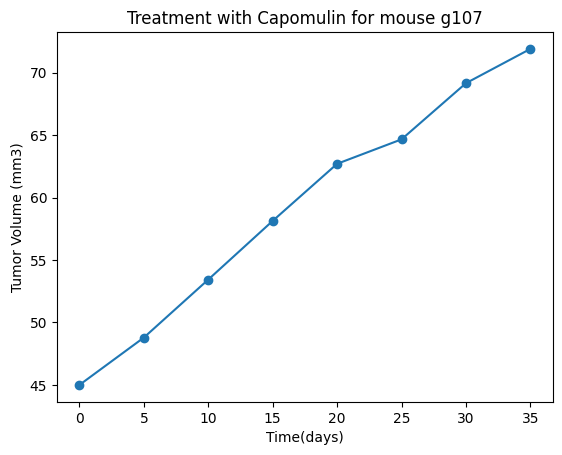

In [119]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse =  combined_data.loc[combined_data["Mouse ID"]=="g107"]
mouse
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker= "o")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Treatment with Capomulin for mouse g107")
plt.show()

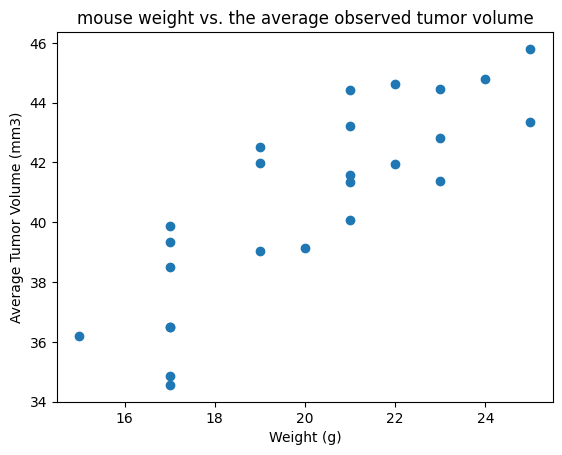

In [120]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_df = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
Avg_Tumor_Capomulin = Capomulin_df["Tumor Volume (mm3)"].mean()
m_weight = Capomulin_df["Weight (g)"].unique()
plt.scatter(m_weight, Avg_Tumor_Capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("mouse weight vs. the average observed tumor volume")
plt.show()

## Correlation and Regression

 The correlation between mosue weight and the average tumor volume is 0.84.


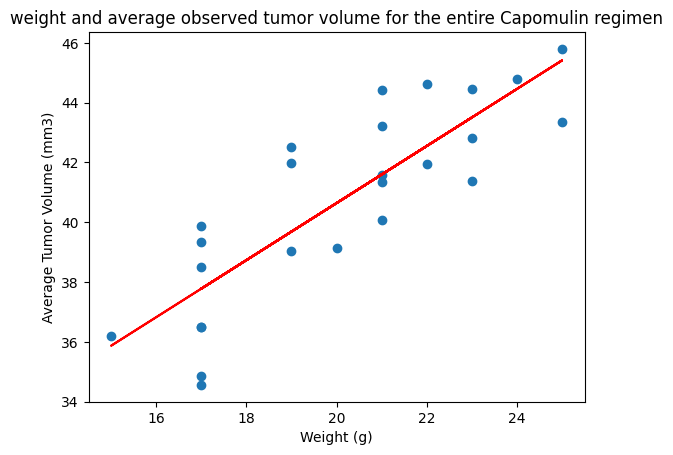

In [122]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
m_weight = m_weight.astype(float)
correlation = st.pearsonr(m_weight, Avg_Tumor_Capomulin)
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(m_weight, Avg_Tumor_Capomulin)
regress_values = m_weight *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter( m_weight, Avg_Tumor_Capomulin)
plt.plot(m_weight, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("weight and average observed tumor volume for the entire Capomulin regimen")
print(f" The correlation between mosue weight and the average tumor volume is {round(correlation[0], 2)}.")
plt.show()